***DATA CLEANING WITH PANDAS***


Importing our libraries

In [222]:
#We import pandas and numpy
import pandas as pd

import numpy as np

Reading the data set from the csv file

In [223]:
df = pd.read_csv('Autolib.csv')

Previewing the data set

In [224]:
#Showing the first 5 rows
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


Getting information on the data set

In [225]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

(5000, 25)

Cleaning the data set


In [226]:
#A clean dataset should be valid, consistent, uniform, complete and accurate.

Validity


In [227]:
#We test for validity by dropping irrelevant columns, 
#removing white spaces and fixing typos
#Dropping irrelevant columns
df.drop(["Cars", "Address", "Charge Slots", "Charging Status", "Displayed comment", "ID", "Kind", "Scheduled at", "Slots", "Station type", "Status", "Subscription status"], axis=1, inplace=True)
df.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Geo point,Postal code,Public name,Rental status,year,month,day,hour,minute
0,0,0,0,Paris,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2018,4,8,11,43
1,6,0,0,Paris,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24
2,3,0,2,Le Bourget,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14
3,3,1,0,Paris,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37
4,3,0,0,Paris,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Bluecar counter     5000 non-null   int64 
 1   Utilib counter      5000 non-null   int64 
 2   Utilib 1.4 counter  5000 non-null   int64 
 3   City                5000 non-null   object
 4   Geo point           5000 non-null   object
 5   Postal code         5000 non-null   int64 
 6   Public name         5000 non-null   object
 7   Rental status       5000 non-null   object
 8   year                5000 non-null   int64 
 9   month               5000 non-null   int64 
 10  day                 5000 non-null   int64 
 11  hour                5000 non-null   int64 
 12  minute              5000 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 507.9+ KB


Accuracy

In [229]:
#Inaccuracy occurs when there are 2 or more values in the same row/across
#Our dataset is accurate

Completeness


In [230]:
#We check for incompleteness by checking for missing vales 
#dropping missing values and replacing mean, median or mode
df.isnull().sum()

Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
Geo point             0
Postal code           0
Public name           0
Rental status         0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

Consistency

In [231]:
#We check for inconsitency in our dataset by checking for duplicates and dropping them
# Identifying which observations are duplicates
df_non_duplicates = df.drop_duplicates()
# Let's see these non-duplicate files
df_non_duplicates

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Geo point,Postal code,Public name,Rental status,year,month,day,hour,minute
0,0,0,0,Paris,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2018,4,8,11,43
1,6,0,0,Paris,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24
2,3,0,2,Le Bourget,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14
3,3,1,0,Paris,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37
4,3,0,0,Paris,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,2018,4,6,11,26
4996,4,0,0,Paris,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2018,4,4,16,56
4997,1,0,0,Paris,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,2018,4,1,7,1
4998,2,0,0,Fontenay-Sous-Bois,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,2018,4,4,17,27


Uniformity

In [232]:
#We check for uniformity by renaming and fixing messy columns
#Also, converting the data types
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,geo_point,postal_code,public_name,rental_status,year,month,day,hour,minute
0,0,0,0,Paris,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2018,4,8,11,43
1,6,0,0,Paris,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24
2,3,0,2,Le Bourget,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14
3,3,1,0,Paris,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37
4,3,0,0,Paris,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23


Checking for outliers and dropping them


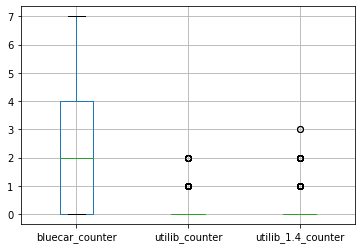

In [233]:
#We'll use boxplot to check for the outliers
df.boxplot(column=['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter'])

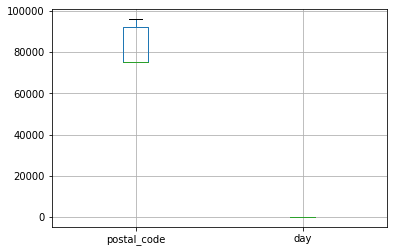

In [234]:
df.boxplot(column=['postal_code', 'day'])

In [235]:
# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(4210, 13)
(5000, 13)


In [236]:
df.to_csv('clean_data.csv')

**Data Analysis**

Bluecar


In [237]:
#To compute usage, we will need to understand that we have to join successive (in time) measures/counters for a given station,
#as the difference will tell whether a car was picked up, returned, or nothing happened
#We we will do this using the diff() function and create a new column; bluecar_use
#This will show when the cars are hired or when they are not in use
#A positive number means they're returned and are not in use
#A negative shows that they have been hired
#0 shows that there are no cars in the station
df['bluecar_use'] = df['bluecar_counter'].diff()
df.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,geo_point,postal_code,public_name,rental_status,year,month,day,hour,minute,bluecar_use
0,0,0,0,Paris,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2018,4,8,11,43,NaN
1,6,0,0,Paris,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,6.0
2,3,0,2,Le Bourget,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14,-3.0
3,3,1,0,Paris,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37,0.0
4,3,0,0,Paris,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23,0.0


In [238]:
#Identify the most popular hour of the day for picking up a shared electric car 
#(Bluecar) in the city of Paris over the month of April 2018
df[(df.city == 'Paris') & (df.bluecar_use < 0)].groupby('hour')['hour'].count().sort_values(ascending=False).head(1)

hour
21    80
Name: hour, dtype: int64

In [239]:
#What is the most popular hour for returning cars?
df[(df.city == 'Paris') & (df.bluecar_use > 0)].groupby('hour')['hour'].count().sort_values(ascending=False).head(1)

hour
3    49
Name: hour, dtype: int64

In [240]:
#What station is the most popular?
#Overall?
df.groupby('public_name')['bluecar_counter'].count().sort_values(ascending=False).head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: bluecar_counter, dtype: int64

In [241]:
#What is the most popular station at the most popular picking hour
df[(df.hour == 21)]['public_name'].value_counts().head(1)

Paris/Tronchet/19    4
Name: public_name, dtype: int64

In [242]:
#What postal code is the most popular for picking up Blue cars? 
#Does the most popular station belong to that postal code?
#Overall?
df[(df.city == 'Paris') & (df.bluecar_use <= 0)].groupby('postal_code')['hour'].count().sort_values(ascending=False).head(1)

postal_code
75015    161
Name: hour, dtype: int64

Considering utilib instead

In [243]:
df['utilib_use'] = df['utilib_counter'].diff()
df.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,geo_point,postal_code,public_name,rental_status,year,month,day,hour,minute,bluecar_use,utilib_use
0,0,0,0,Paris,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2018,4,8,11,43,NaN,NaN
1,6,0,0,Paris,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,6.0,0.0
2,3,0,2,Le Bourget,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14,-3.0,0.0
3,3,1,0,Paris,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37,0.0,1.0
4,3,0,0,Paris,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23,0.0,-1.0


In [244]:
#Identify the most popular hour of the day for picking up a shared electric car 
#(utilib) in the city of Paris over the month of April 2018
df[(df.city == 'Paris') & (df.utilib_use < 0)].groupby('hour')['hour'].count().sort_values(ascending=False).head(1)

hour
19    12
Name: hour, dtype: int64

In [245]:
#What is the most popular hour for returning cars?
df[(df.city == 'Paris') & (df.utilib_use > 0)].groupby('hour')['hour'].count().sort_values(ascending=False).head(1)

hour
6    12
Name: hour, dtype: int64

In [246]:
#What station is the most popular?
#Overall?
df.groupby('public_name')['utilib_counter'].count().sort_values(ascending=False).head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: utilib_counter, dtype: int64

In [247]:
#What station is the most popular station at the most popular picking hour
df[(df.hour == 19)]['public_name'].value_counts().head(1)

Boulogne-Billancourt/AndrÃ© Morizet/121    2
Name: public_name, dtype: int64

In [248]:
#What postal code is the most popular for picking up Utilib cars? 
#Does the most popular station belong to that postal code?
#Overall?
df[(df.city == 'Paris') & (df.utilib_use <= 0)].groupby('postal_code')['hour'].count().sort_values(ascending=False).head(1)

postal_code
75015    257
Name: hour, dtype: int64

Considering utilib 1.4 instead

In [249]:
df['utilib1_use'] = df['utilib_1.4_counter'].diff()
df.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,geo_point,postal_code,public_name,rental_status,year,month,day,hour,minute,bluecar_use,utilib_use,utilib1_use
0,0,0,0,Paris,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2018,4,8,11,43,NaN,NaN,NaN
1,6,0,0,Paris,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,6.0,0.0,0.0
2,3,0,2,Le Bourget,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14,-3.0,0.0,2.0
3,3,1,0,Paris,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37,0.0,1.0,-2.0
4,3,0,0,Paris,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23,0.0,-1.0,0.0


In [250]:
#Identify the most popular hour of the day for picking up a shared electric car 
#(utilib) in the city of Paris over the month of April 2018
df[(df.city == 'Paris') & (df.utilib1_use < 0)].groupby('hour')['hour'].count().sort_values(ascending=False).head(1)

hour
3    20
Name: hour, dtype: int64

In [251]:
#What is the most popular hour for returning cars?
df[(df.city == 'Paris') & (df.utilib1_use > 0)].groupby('hour')['hour'].count().sort_values(ascending=False).head(1)

hour
9    17
Name: hour, dtype: int64

In [252]:
#What station is the most popular?
#Overall?
df.groupby('public_name')['utilib_1.4_counter'].count().sort_values(ascending=False).head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: utilib_1.4_counter, dtype: int64

In [253]:
#What station is the most popular station at the most popular picking hour
df[(df.hour == 3)]['public_name'].value_counts().head(1)

Paris/Victor Hugo/60    3
Name: public_name, dtype: int64

In [254]:
#What postal code is the most popular for picking up Utilib cars? 
#Does the most popular station belong to that postal code?
#Overall?
df[(df.city == 'Paris') & (df.utilib1_use <= 0)].groupby('postal_code')['hour'].count().sort_values(ascending=False).head(1)

postal_code
75015    246
Name: hour, dtype: int64